In [15]:
pip install imbalanced-learn


     -------------------------------------- 226.0/226.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


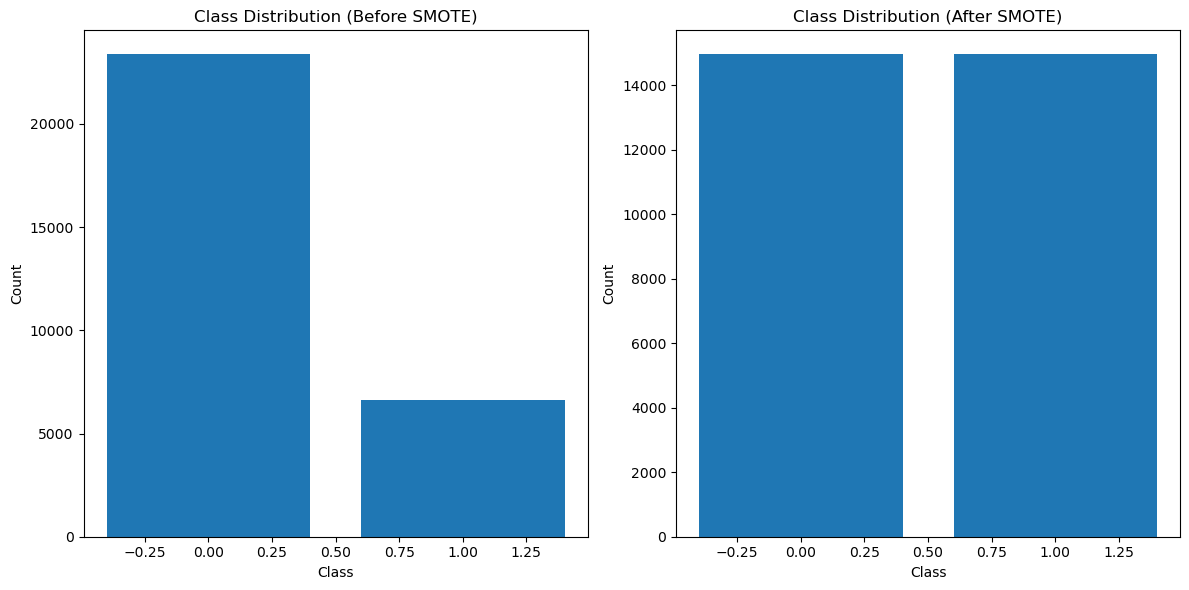

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Data Pre-processing
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Encode categorical variables (if any)
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

# Split the dataset into features and labels
X = df.drop('default payment next month', axis=1).values
y = df['default payment next month'].values

# Calculate class distribution before SMOTE
class_counts_before = pd.Series(y).value_counts()

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Calculate class distribution after SMOTE
class_counts_after = pd.Series(y_train_resampled).value_counts()

# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].bar(class_counts_before.index, class_counts_before.values)
axes[0].set_title('Class Distribution (Before SMOTE)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[1].bar(class_counts_after.index, class_counts_after.values)
axes[1].set_title('Class Distribution (After SMOTE)')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


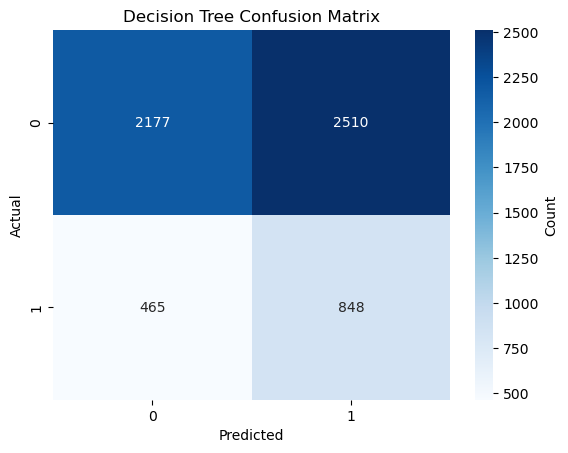

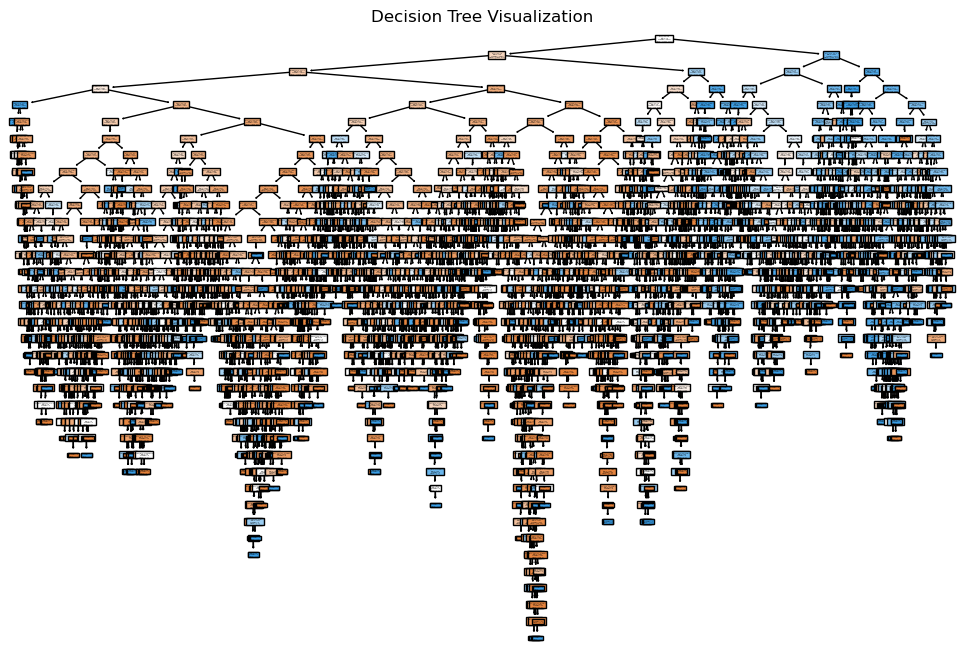

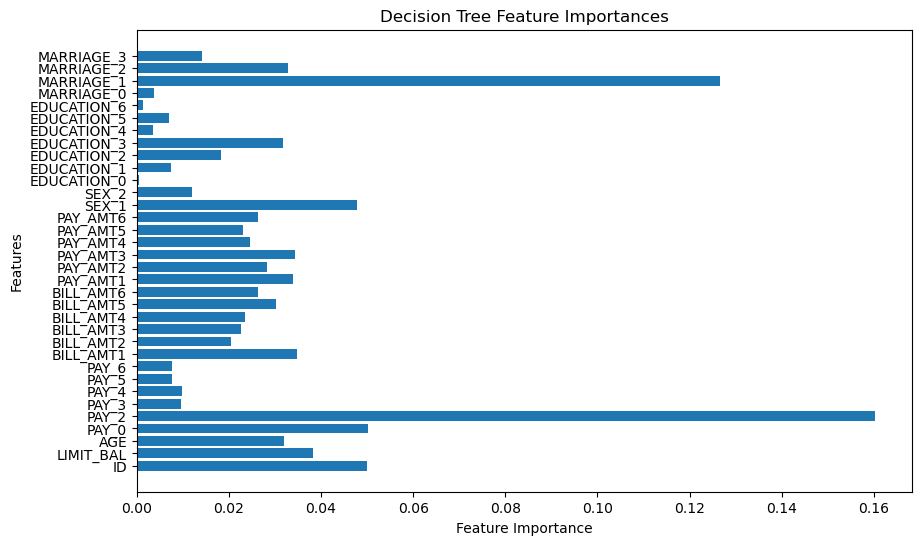

Decision Tree Accuracy: 0.5041666666666667
Decision Tree Precision: 0.2525312686122692
Decision Tree Recall: 0.6458492003046459
Decision Tree F1-score: 0.3630914151145366
Decision Tree ROC AUC: 0.5551627055502321


In [19]:
from sklearn.tree import plot_tree

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)

# Plot Decision Tree Confusion Matrix
plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.drop('default payment next month', axis=1).columns)
plt.title('Decision Tree Visualization')
plt.show()

# Plot Feature Importances
importances = dt.feature_importances_
features = df.drop('default payment next month', axis=1).columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importances')
plt.show()

print('Decision Tree Accuracy:', dt_accuracy)
print('Decision Tree Precision:', dt_precision)
print('Decision Tree Recall:', dt_recall)
print('Decision Tree F1-score:', dt_f1)
print('Decision Tree ROC AUC:', dt_roc_auc)


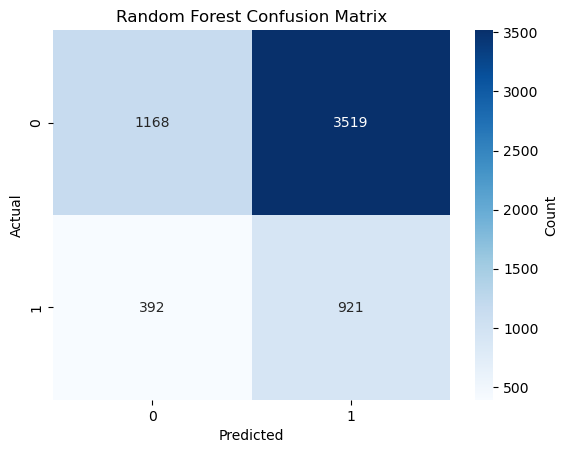

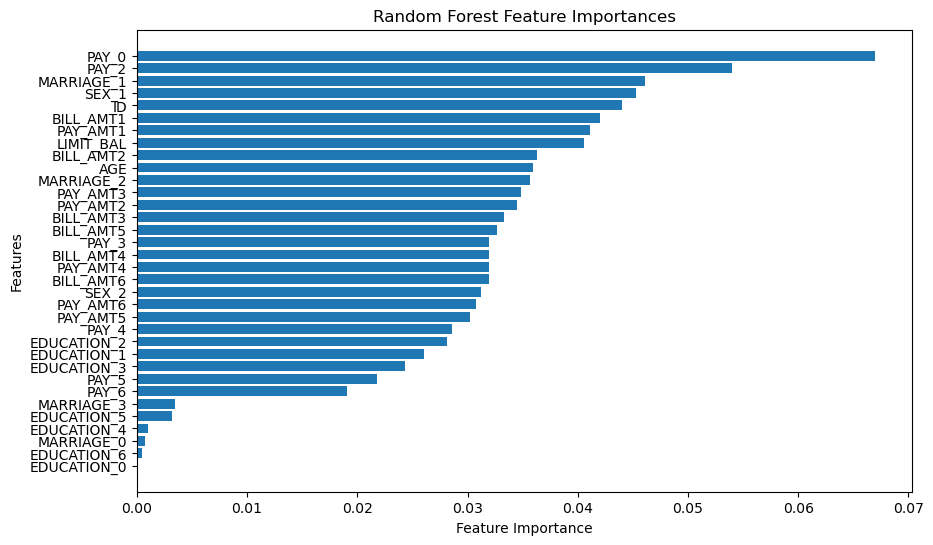

Random Forest Accuracy: 0.3481666666666667
Random Forest Precision: 0.20743243243243242
Random Forest Recall: 0.7014470677837015
Random Forest F1-score: 0.3201807752476969
Random Forest ROC AUC: 0.47532349122063255


In [20]:
from sklearn.metrics import confusion_matrix

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)

# Plot Random Forest Confusion Matrix
confusion_mat = confusion_matrix(y_test, rf_predictions)
plt.figure()
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = rf.feature_importances_
features = df.drop('default payment next month', axis=1).columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[sorted_indices])
plt.yticks(range(len(features)), features[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()

print('Random Forest Accuracy:', rf_accuracy)
print('Random Forest Precision:', rf_precision)
print('Random Forest Recall:', rf_recall)
print('Random Forest F1-score:', rf_f1)
print('Random Forest ROC AUC:', rf_roc_auc)


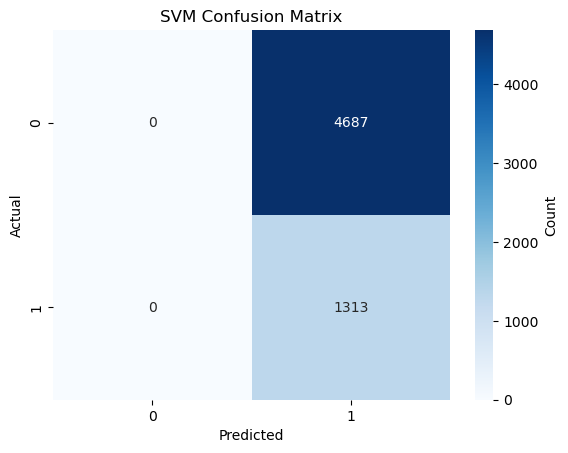

SVM Accuracy: 0.21883333333333332
SVM Precision: 0.21883333333333332
SVM Recall: 1.0
SVM F1-score: 0.35908655818405577
SVM ROC AUC: 0.5


In [21]:
# Support Vector Machines
svm = SVC()
svm.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)

# Plot SVM Confusion Matrix
plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('SVM Accuracy:', svm_accuracy)
print('SVM Precision:', svm_precision)
print('SVM Recall:', svm_recall)
print('SVM F1-score:', svm_f1)
print('SVM ROC AUC:', svm_roc_auc)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


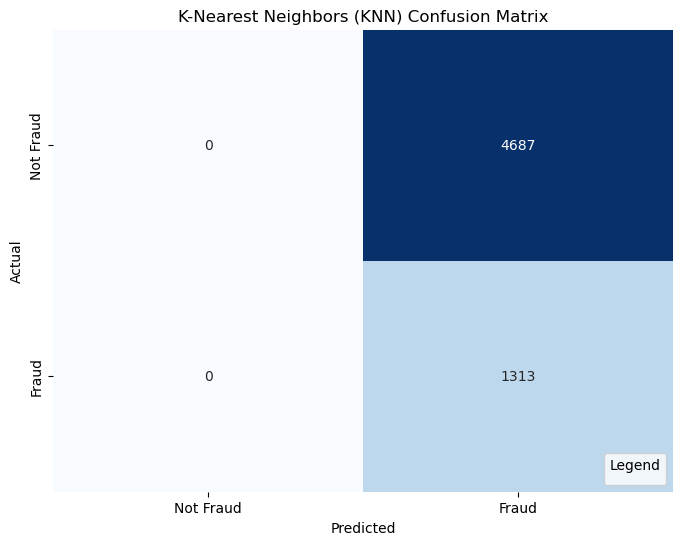

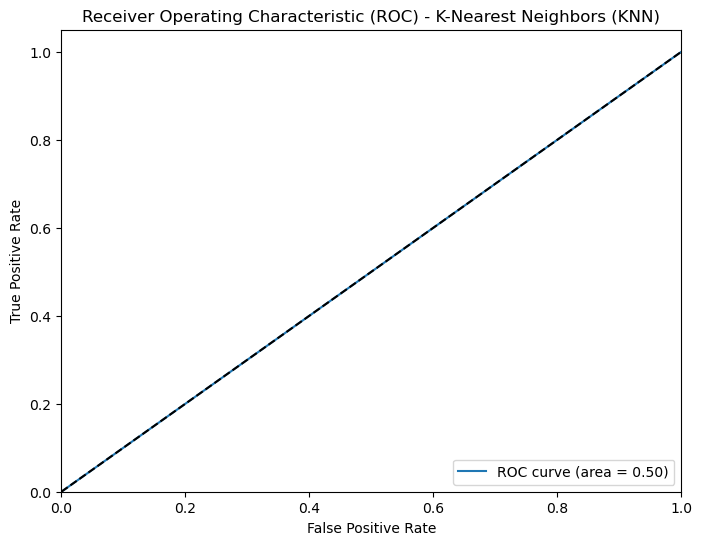

K-Nearest Neighbors (KNN) Accuracy: 0.21883333333333332
K-Nearest Neighbors (KNN) Precision: 0.21883333333333332
K-Nearest Neighbors (KNN) Recall: 1.0
K-Nearest Neighbors (KNN) F1-score: 0.35908655818405577
K-Nearest Neighbors (KNN) ROC AUC: 0.5


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
knn_predictions = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add custom legend
class_names = ['Not Fraud', 'Fraud']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names, ha='center')
plt.yticks(tick_marks + 0.5, class_names, va='center')
plt.legend(title='Legend', labels=['True Negative', 'False Positive', 'False Negative', 'True Positive'], loc='lower right')

plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, knn_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - K-Nearest Neighbors (KNN)')
plt.legend(loc="lower right")
plt.show()

print('K-Nearest Neighbors (KNN) Accuracy:', knn_accuracy)
print('K-Nearest Neighbors (KNN) Precision:', knn_precision)
print('K-Nearest Neighbors (KNN) Recall:', knn_recall)
print('K-Nearest Neighbors (KNN) F1-score:', knn_f1)
print('K-Nearest Neighbors (KNN) ROC AUC:', knn_roc_auc)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


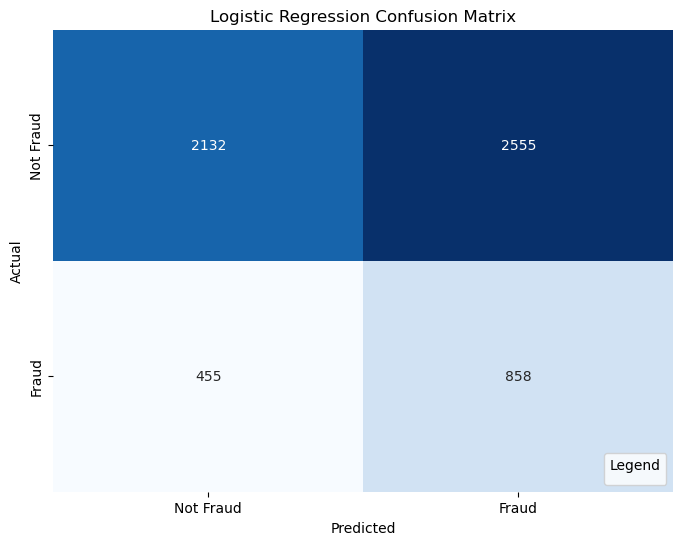

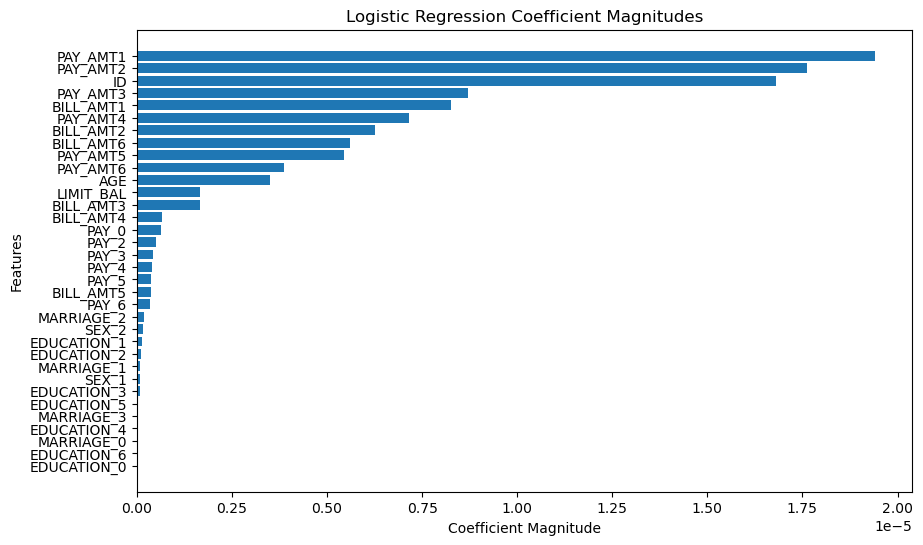

Logistic Regression Accuracy: 0.49833333333333335
Logistic Regression Precision: 0.2513917374743627
Logistic Regression Recall: 0.6534653465346535
Logistic Regression F1-score: 0.3630977570884469
Logistic Regression ROC AUC: 0.5541702666106167


In [23]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
lr_predictions = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add custom legend
class_names = ['Not Fraud', 'Fraud']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names, ha='center')
plt.yticks(tick_marks + 0.5, class_names, va='center')
plt.legend(title='Legend', labels=['True Negative', 'False Positive', 'False Negative', 'True Positive'], loc='lower right')

plt.show()

# Plot Coefficient Magnitudes
coefs = lr.coef_[0]
features = df.drop('default payment next month', axis=1).columns
sorted_indices = np.argsort(np.abs(coefs))
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), np.abs(coefs[sorted_indices]))
plt.yticks(range(len(features)), features[sorted_indices])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficient Magnitudes')
plt.show()

print('Logistic Regression Accuracy:', lr_accuracy)
print('Logistic Regression Precision:', lr_precision)
print('Logistic Regression Recall:', lr_recall)
print('Logistic Regression F1-score:', lr_f1)
print('Logistic Regression ROC AUC:', lr_roc_auc)


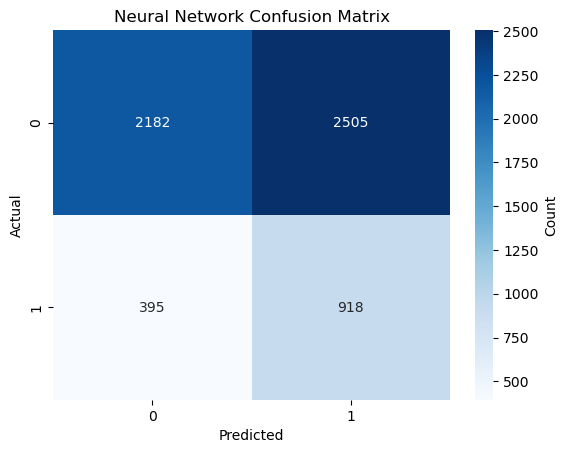

Neural Network Accuracy: 0.5166666666666667
Neural Network Precision: 0.26818580192813324
Neural Network Recall: 0.6991622239146992
Neural Network F1-score: 0.38766891891891897
Neural Network ROC AUC: 0.5823526075835497


In [24]:
from sklearn.neural_network import MLPClassifier

# Neural Networks
nn = MLPClassifier()
nn.fit(X_train_resampled, y_train_resampled)
nn_predictions = nn.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)
nn_roc_auc = roc_auc_score(y_test, nn_predictions)

# Plot Neural Network Confusion Matrix
plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Neural Network Accuracy:', nn_accuracy)
print('Neural Network Precision:', nn_precision)
print('Neural Network Recall:', nn_recall)
print('Neural Network F1-score:', nn_f1)
print('Neural Network ROC AUC:', nn_roc_auc)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


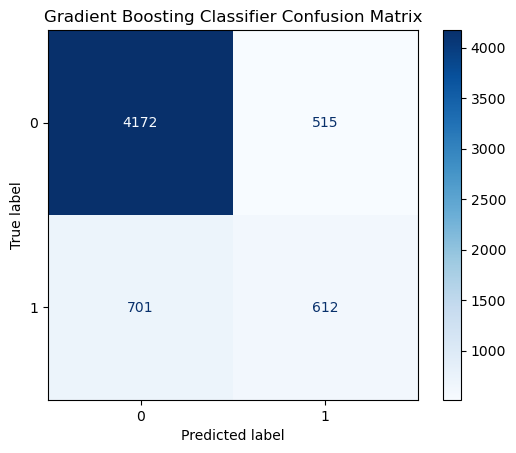

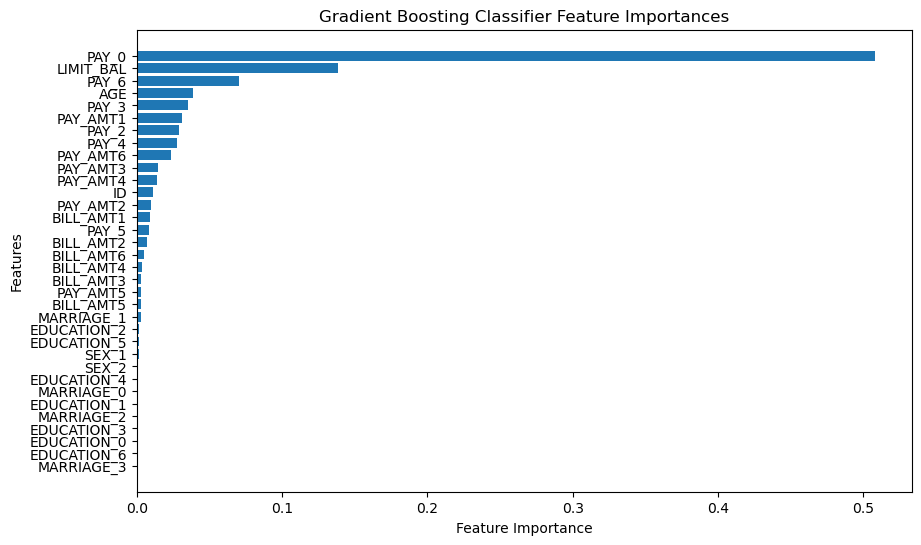

Gradient Boosting Classifier Accuracy: 0.7973333333333333
Gradient Boosting Classifier Precision: 0.5430346051464063
Gradient Boosting Classifier Recall: 0.4661081492764661
Gradient Boosting Classifier F1-score: 0.5016393442622951
Gradient Boosting Classifier ROC AUC: 0.6781148811242582


In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix
import seaborn as sns

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train_resampled, y_train_resampled)
gb_predictions = gb.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
gb_roc_auc = roc_auc_score(y_test, gb_predictions)

# Plot Confusion Matrix
plot_confusion_matrix(gb, X_test_scaled, y_test, cmap='Blues')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

# Plot Feature Importances
importances = gb.feature_importances_
features = df.drop('default payment next month', axis=1).columns
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[sorted_indices])
plt.yticks(range(len(features)), features[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Classifier Feature Importances')
plt.show()

print('Gradient Boosting Classifier Accuracy:', gb_accuracy)
print('Gradient Boosting Classifier Precision:', gb_precision)
print('Gradient Boosting Classifier Recall:', gb_recall)
print('Gradient Boosting Classifier F1-score:', gb_f1)
print('Gradient Boosting Classifier ROC AUC:', gb_roc_auc)


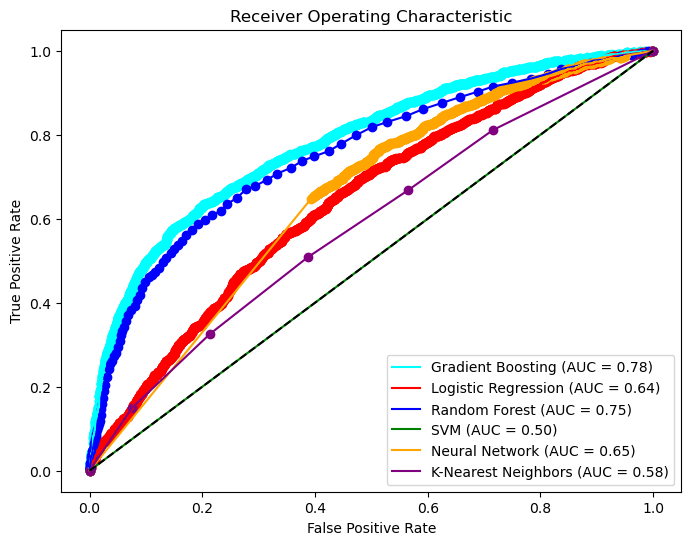

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
gb_probs = gb.predict_proba(X_test_scaled)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)

# Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Neural Network
nn_probs = nn.predict_proba(X_test)[:, 1]
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
nn_auc = auc(nn_fpr, nn_tpr)

# K-Nearest Neighbors (KNN)
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# SVM
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
svm_scores = svm.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_scores)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves with data points
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (AUC = {:.2f})'.format(gb_auc), color='cyan')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc), color='red')
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc), color='blue')
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc), color='green')
plt.plot(nn_fpr, nn_tpr, label='Neural Network (AUC = {:.2f})'.format(nn_auc), color='orange')
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc), color='purple')

# Add data points
plt.scatter(gb_fpr, gb_tpr, c='cyan')
plt.scatter(lr_fpr, lr_tpr, c='red')
plt.scatter(rf_fpr, rf_tpr, c='blue')
plt.scatter(svm_fpr, svm_tpr, c='green')
plt.scatter(nn_fpr, nn_tpr, c='orange')
plt.scatter(knn_fpr, knn_tpr, c='purple')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
